In [1]:
function accuracy()
    ac=2400;
    return ac;
end

accuracy (generic function with 1 method)

In [2]:
setprecision(accuracy());

In [3]:
function order()
    M=400;
    return M+1;
end

order (generic function with 1 method)

In [4]:
function goon(A)
    A[end,:] = A[end,1];
    return A
end 

goon (generic function with 1 method)

In [5]:
function steps()
    h = BigFloat(1)/BigFloat(20)
    return h;
end

steps (generic function with 1 method)

In [6]:
function JCh(k,i)
     
    k = BigFloat(k);
    i = BigFloat(i);
    s = BigFloat(1);
    if i < k/2
        i = k - i;
    end
    for j in range(k,i+1,step=-1)
        
        j1=BigFloat(j)
        s = s*j1/(j1-i)
        
    end
    
    return s
end

JCh (generic function with 1 method)

In [7]:
function DJCh()
    Cki = Array{BigFloat}(undef,order()-1,order()-1);
    for k in 1:order()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end

DJCh (generic function with 1 method)

In [8]:
function multi()
    S = Array{BigFloat}(undef,1,order());
    S[1] = BigFloat(1)
    
    for i in 1:order()-1
        S[i+1] = S[i]*steps()/BigFloat(i)
    end
    
    return S
end

multi (generic function with 1 method)

In [9]:
function Sumxyz(k,x,y,Cki)
    s = sum(Cki[k+1,1:k+1].*reverse!(x).*y)
    return s
end 

Sumxyz (generic function with 1 method)

In [10]:
function Sumuw(k,u,w,Cki,x,z)  
    s = sum(Cki[k+1,1:k+1].*u.*reverse!(z)) + sum(Cki[k+1,1:k+1].*reverse!(w).*x)
    return s
end 

Sumuw (generic function with 1 method)

In [11]:
function Sumuv(k,u,v,Cki,x,y)
    s = sum(Cki[k+1,1:k+1].*u.*reverse!(y)) + sum(Cki[k+1,1:k+1].*reverse!(v).*x)
    return s
end 

Sumuv (generic function with 1 method)

In [12]:
function Talor(x,y,z,Cki,u,v,w)
    for k in 1:order()-1
        x[k+1] = c*(-x[k] + y[k])
        y[k+1] = R*x[k] - y[k] - Sumxyz(k-1,x[1:k],z[1:k],Cki)
        z[k+1] = Sumxyz(k-1,x[1:k],y[1:k],Cki) - b*z[k]
    end  
    for k in 1:order()-1
        u[k+1] = c*(-u[k] + v[k])
        v[k+1] = R*u[k] - v[k] - Sumuw(k-1,u[1:k],w[1:k],Cki,x[1:k],z[1:k])
        w[k+1] = Sumuv(k-1,u[1:k],v[1:k],Cki,x[1:k],y[1:k]) - b*w[k]
        #println(convert.(Float16,log10(abs(u[k]))),convert.(Float16,log10(abs(v[k]))),convert.(Float16,log10(abs(w[k]))))
    end
    return [x,y,z],[u,v,w]
end

Talor (generic function with 1 method)

In [13]:
function Iteration(x,y,z,Times,Cki,Lorenz,u,v,w,Ep)
    
    for st in 1:Times
    
        Tay,Tby = Talor(x,y,z,Cki,u,v,w)
        x = Tay[1]
        y = Tay[2]
        z = Tay[3]
        u = Tby[1]
        v = Tby[2]
        w = Tby[3]
        
        x[1] = sum(Dmulti[1:order()].*x[1:order()]);
        y[1] = sum(Dmulti[1:order()].*y[1:order()]);
        z[1] = sum(Dmulti[1:order()].*z[1:order()]);
        
        u[1] = sum(Dmulti[1:order()].*u[1:order()]);
        v[1] = sum(Dmulti[1:order()].*v[1:order()]);
        w[1] = sum(Dmulti[1:order()].*w[1:order()]);
    
        Lorenz[st,:] = [x[1],y[1],z[1]] 
        Ep[st] = (u[1] + v[1] +w[1])/(BigFloat(3)/BigFloat(1000)) 
        if mod(st,100) == 0
            println("t=",convert(Float16,st*steps())," Ep=",convert(Float16,log10(abs(Ep[st])))," x=",convert.(Float16,Lorenz[st,1]))
        end
    end
    
    return Lorenz,Ep
    
end

Iteration (generic function with 1 method)

In [14]:
#defining
setprecision(accuracy());

Times = 20*250;     #attension to use steps
a1 = rand()*BigFloat(10)^(-480)
a2 = rand()*BigFloat(10)^(-480)
a3 = rand()*BigFloat(10)^(-480)

c = BigFloat(10);
R = BigFloat(28) #+ BigFloat(1)/BigFloat(2);
b = BigFloat(8)/BigFloat(3);

x = Array{BigFloat}(undef,order())
y = Array{BigFloat}(undef,order())
z = Array{BigFloat}(undef,order())
x[1] = BigFloat(-15) - BigFloat(8)/BigFloat(10); 
y[1] = BigFloat(-17) - BigFloat(48)/BigFloat(100); 
z[1] = BigFloat(35) + BigFloat(64)/BigFloat(100);
u = Array{BigFloat}(undef,order())
v = Array{BigFloat}(undef,order())
w = Array{BigFloat}(undef,order())
u[1] = a1
v[1] = a2 
w[1] = a3

Lorenz = Array{BigFloat}(undef,Times,3);
Ep = Array{BigFloat}(undef,Times,1);
Cki = Array{BigFloat}(undef,order()-1,order()-1);
Dmulti = Array{BigFloat}(undef,1,order());

Cki = DJCh();
Dmulti = multi();

In [15]:
#Main 
@time Lorenz,Ep = Iteration(x,y,z,Times,Cki,Lorenz,u,v,w,Ep);

t=5.0 Ep=-475.2 x=-0.2627
t=10.0 Ep=-472.8 x=11.44
t=15.0 Ep=-470.5 x=-15.56
t=20.0 Ep=-469.2 x=-4.074
t=25.0 Ep=-466.0 x=15.92
t=30.0 Ep=-465.5 x=6.54
t=35.0 Ep=-463.0 x=5.23
t=40.0 Ep=-461.2 x=10.62
t=45.0 Ep=-460.8 x=0.851
t=50.0 Ep=-457.0 x=12.78
t=55.0 Ep=-455.2 x=4.492
t=60.0 Ep=-453.2 x=-4.023
t=65.0 Ep=-451.5 x=10.66
t=70.0 Ep=-449.2 x=-1.836
t=75.0 Ep=-447.2 x=13.53
t=80.0 Ep=-445.0 x=-4.207
t=85.0 Ep=-442.2 x=-11.94
t=90.0 Ep=-441.2 x=13.84
t=95.0 Ep=-438.8 x=-0.9604
t=100.0 Ep=-436.0 x=-10.51
t=105.0 Ep=-435.8 x=-3.209
t=110.0 Ep=-433.8 x=9.44
t=115.0 Ep=-432.0 x=-4.074
t=120.0 Ep=-429.8 x=1.161
t=125.0 Ep=-427.5 x=9.664
t=130.0 Ep=-426.2 x=-0.644
t=135.0 Ep=-423.2 x=13.0
t=140.0 Ep=-421.5 x=1.4375
t=145.0 Ep=-418.5 x=13.055
t=150.0 Ep=-417.8 x=-1.968
t=155.0 Ep=-415.5 x=-13.15
t=160.0 Ep=-413.0 x=-0.63
t=165.0 Ep=-411.5 x=-4.062
t=170.0 Ep=-409.5 x=8.53
t=175.0 Ep=-406.5 x=3.637
t=180.0 Ep=-405.5 x=3.92
t=185.0 Ep=-403.0 x=-12.26
t=190.0 Ep=-401.8 x=-5.426
t=195.0 Ep=-400.2

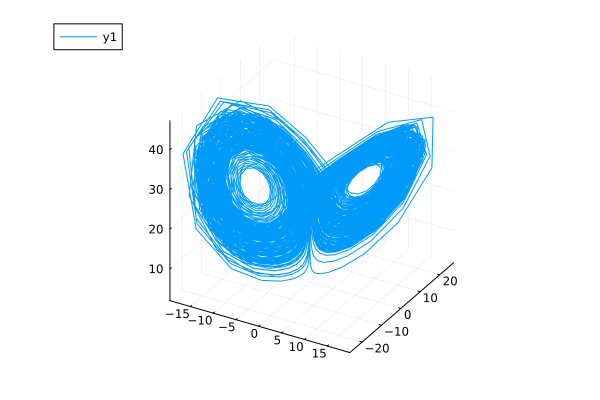

In [16]:
#drawing
using Plots; 
plot(Lorenz[:,1],Lorenz[:,2],Lorenz[:,3])

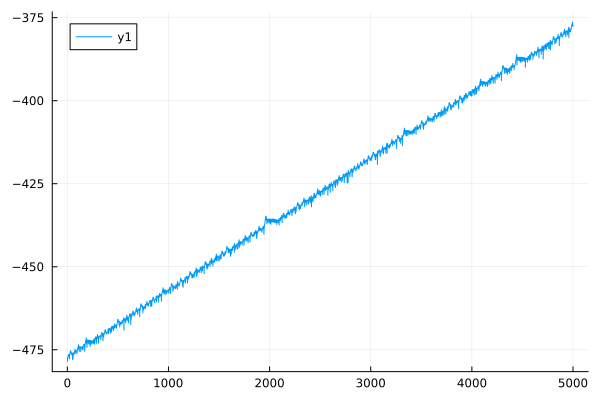

In [17]:
plot(1:Times,log10.(abs.(Ep)))

In [51]:
function Wfile(AT,BE,Times)
#change name--------------------------------------------
    XLSX.openxlsx("CNEP_lorenz03.xlsx", mode="w") do xf
#-------------------------------------------------------
        sheet = xf[1]
        XLSX.rename!(sheet, "new_sheet")
#change location----------------------------------------
        sheet["A1"] = "T"
        sheet["B1"] = "Ep"
        sheet["A2",dim=1] = AT[1:end]
        sheet["B2",dim=1] = BE[1:end]
#-------------------------------------------------------
    end
end
#-----------------------------------------------------------------------------
using XLSX
#time-----------------------------------------------------
AT=Array{Float32}(undef,Times)
for i in 1:Times
    AT[i]=i*steps()
end
#time-----------------------------------------------------
BE=convert.(Float32,log10.(abs.(Ep)));
#--------------------------------------------------------
Wfile(AT,BE,Times);

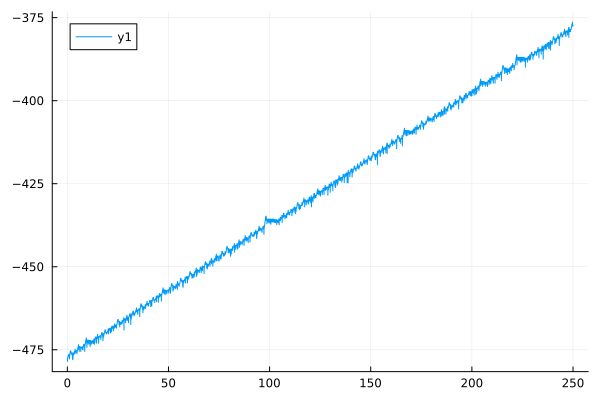

In [55]:
#Read
Rt=XLSX.readdata("CNEP_lorenz03.xlsx","new_sheet!A2:A5001")
Rep=XLSX.readdata("CNEP_lorenz03.xlsx","new_sheet!B2:B5001")
plot(convert.(Float32,Rt),convert.(Float32,Rep))